In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

import pickle
import json

In [2]:
df = pd.read_excel("medical_insurance-Copy1.xlsx")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
a=df.describe().columns
a

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

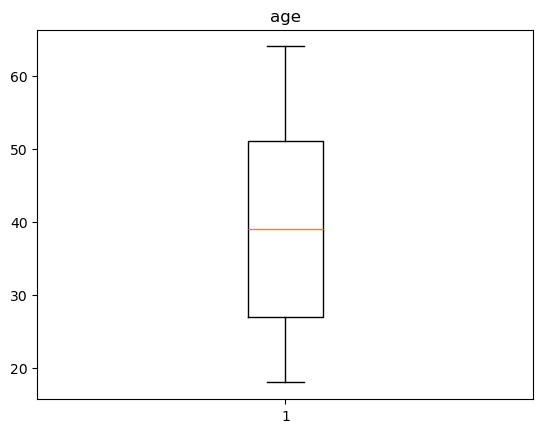

q1 27.0
q3 51.0
iqr 24.0
upper_tail 87.0
****************************************************************************************************


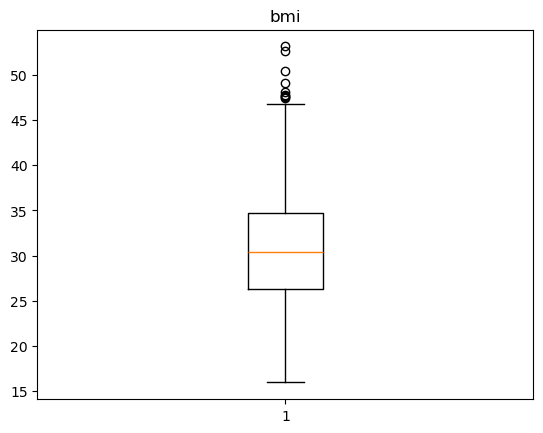

q1 26.29625
q3 34.69375
iqr 8.3975
upper_tail 47.290000000000006
****************************************************************************************************


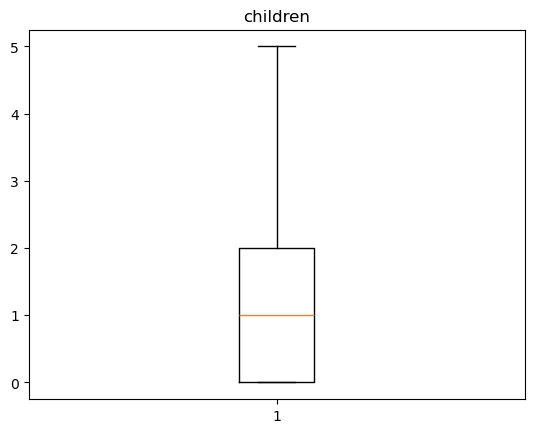

q1 0.0
q3 2.0
iqr 2.0
upper_tail 5.0
****************************************************************************************************


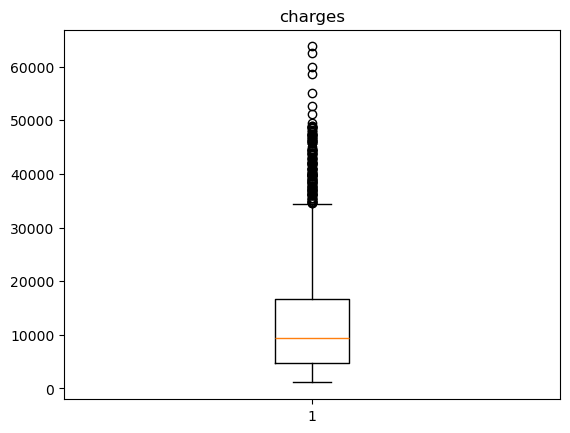

q1 4740.28715
q3 16639.912515
iqr 11899.625365
upper_tail 34489.350562499996
****************************************************************************************************


In [4]:
for i in a:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr

    print("q1",q1)
    print("q3",q3)
    print("iqr",iqr)
    print("upper_tail",upper_tail)
    print("*"*100)

In [5]:
# bmi
q1=26.29625
q3=34.69375
iqr=8.3975
upper_tail=47.290000000000006


In [6]:
df.loc[df['bmi']>upper_tail]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [7]:
df.loc[df['bmi']>upper_tail,'bmi']=upper_tail

In [8]:
df.loc[df['bmi']>upper_tail]

,age,sex,bmi,children,smoker,region,charges


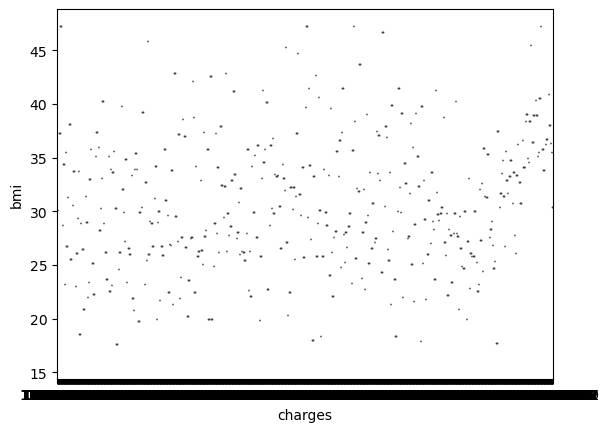

In [9]:
sns.boxplot(data=df,x=df['charges'],y=df['bmi'])
plt.show()

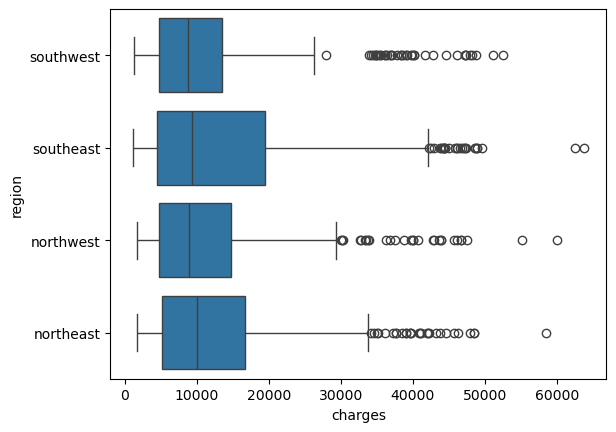

In [10]:
sns.boxplot(data=df,x=df['charges'],y=df['region'])
plt.show()

In [11]:
df[(df['region']=='southwest')& (df['charges']>26000)]

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.30,0,yes,southwest,36837.46700
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914
39,60,male,39.90,0,yes,southwest,48173.36100
84,37,female,34.80,2,yes,southwest,39836.51900
94,64,female,31.30,2,yes,southwest,47291.05500
175,63,female,37.70,0,yes,southwest,48824.45000
223,19,male,34.80,0,yes,southwest,34779.61500
242,55,female,26.80,1,no,southwest,35160.13457


In [12]:
df.loc[(df['region']=='southwest')& (df['charges']>26000),'charges']=26000

In [13]:
df.loc[(df['region']=='southwest')& (df['charges']>26000)]

,age,sex,bmi,children,smoker,region,charges


In [14]:
df.loc[(df['region']=='southeast')& (df['charges']>42000)]

,age,sex,bmi,children,smoker,region,charges
109,63,male,35.09,0,yes,southeast,47055.53210
252,54,male,34.21,2,yes,southeast,44260.74990
265,46,male,42.35,3,yes,southeast,46151.12450
292,25,male,45.54,2,yes,southeast,42112.23560
312,43,male,35.97,3,yes,southeast,42124.51530
420,64,male,33.88,0,yes,southeast,46889.26120
421,61,male,35.86,0,yes,southeast,46599.10840
488,44,female,38.06,0,yes,southeast,48885.13561
530,57,male,42.13,1,yes,southeast,48675.51770
543,54,female,47.29,0,yes,southeast,63770.42801


In [15]:
df.loc[(df['region']=='southeast') & (df['charges']>42000),'charges']=42000

In [16]:
df.loc[(df['region']=='southeast') & (df['charges']>42000)]

,age,sex,bmi,children,smoker,region,charges


In [17]:
df.loc[(df['region']=='northwest') & (df['charges']>28000)]

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
55,58,male,36.955,2,yes,northwest,47496.49445
62,64,male,24.700,1,no,northwest,30166.61817
86,57,female,31.160,0,yes,northwest,43578.93940
128,32,female,17.765,2,yes,northwest,32734.18630
146,46,male,30.495,3,yes,northwest,40720.55105
256,56,male,33.630,0,yes,northwest,43921.18370
259,19,male,31.920,0,yes,northwest,33750.29180
263,19,male,36.955,0,yes,northwest,36219.40545
298,31,male,34.390,3,yes,northwest,38746.35510


In [18]:
df.loc[(df['region']=='northwest') & (df['charges']>28000),'charges']=28000

In [19]:
df.loc[(df['region']=='northwest') & (df['charges']>28000)]

,age,sex,bmi,children,smoker,region,charges


In [20]:
df.loc[(df['region']=='northeast') & (df['charges']>33000)]

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.920,1,yes,northeast,37701.87680
38,35,male,36.670,1,yes,northeast,39774.27630
123,44,male,31.350,1,yes,northeast,39556.49450
185,36,male,41.895,3,yes,northeast,43753.33705
240,23,female,36.670,2,yes,northeast,38511.62830
254,50,male,31.825,0,yes,northeast,41097.16175
281,54,male,40.565,3,yes,northeast,48549.17835
288,59,female,36.765,1,yes,northeast,47896.79135
330,61,female,36.385,1,yes,northeast,48517.56315
338,50,male,32.300,1,yes,northeast,41919.09700


In [21]:
df.loc[(df['region']=='northeast') & (df['charges']>33000),'charges']=33000

In [22]:
df.loc[(df['region']=='northeast') & (df['charges']>33000)]

,age,sex,bmi,children,smoker,region,charges


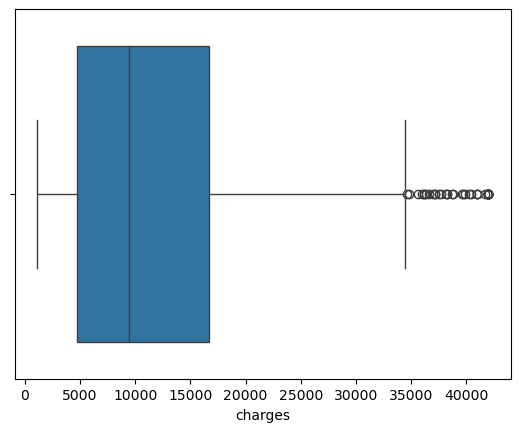

In [23]:
sns.boxplot(data=df,x=df['charges'])
plt.show()

In [24]:
df['sex'].replace({"female":0, "male":1}, inplace= True)
df['smoker'].replace({"no":0, "yes":1}, inplace= True)
df = pd.get_dummies(df, columns=['region']).astype(int)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,0,1
1,18,1,33,1,0,1725,0,0,1,0
2,28,1,33,3,0,4449,0,0,1,0
3,33,1,22,0,0,21984,0,1,0,0
4,32,1,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,0,1,0,0
1334,18,0,31,0,0,2205,1,0,0,0
1335,18,0,36,0,0,1629,0,0,1,0
1336,21,0,25,0,0,2007,0,0,0,1


In [25]:
df1=df.drop('charges',axis=1)

In [26]:
df1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,0,0,0,1
1,18,1,33,1,0,0,0,1,0
2,28,1,33,3,0,0,0,1,0
3,33,1,22,0,0,0,1,0,0
4,32,1,28,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,0,1,0,0
1334,18,0,31,0,0,1,0,0,0
1335,18,0,36,0,0,0,0,1,0
1336,21,0,25,0,0,0,0,0,1


In [27]:
df1['charges']=df['charges']

In [28]:
df1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27,0,1,0,0,0,1,16884
1,18,1,33,1,0,0,0,1,0,1725
2,28,1,33,3,0,0,0,1,0,4449
3,33,1,22,0,0,0,1,0,0,21984
4,32,1,28,0,0,0,1,0,0,3866
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,0,1,0,0,10600
1334,18,0,31,0,0,1,0,0,0,2205
1335,18,0,36,0,0,0,0,1,0,1629
1336,21,0,25,0,0,0,0,0,1,2007


In [29]:
df1.corr().tail(1)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
charges,0.324565,0.054057,0.169872,0.069508,0.769963,0.018645,-0.057059,0.124403,-0.090663,1.0


<Axes: >

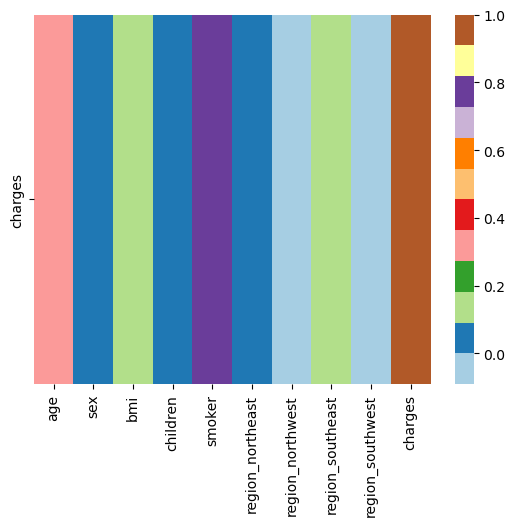

In [30]:

sns.heatmap(df1.corr().tail(1), cmap="Paired")

In [31]:
df1.corr()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,-0.020856,0.111050,0.042469,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.324565
sex,-0.020856,1.000000,0.044984,0.017163,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.054057
bmi,0.111050,0.044984,1.000000,0.012048,0.001218,-0.138889,-0.138215,0.269931,-0.003157,0.169872
children,0.042469,0.017163,0.012048,1.000000,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.069508
smoker,-0.025019,0.076185,0.001218,0.007673,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.769963
region_northeast,0.002475,-0.002425,-0.138889,-0.022808,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.018645
region_northwest,-0.000407,-0.011156,-0.138215,0.024806,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.057059
region_southeast,-0.011642,0.017117,0.269931,-0.023066,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.124403
region_southwest,0.010016,-0.004184,-0.003157,0.021914,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.090663
charges,0.324565,0.054057,0.169872,0.069508,0.769963,0.018645,-0.057059,0.124403,-0.090663,1.000000


In [32]:
x = df1.drop('charges', axis= 1)
y = df1['charges']


In [33]:
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,0,0,0,1
1,18,1,33,1,0,0,0,1,0
2,28,1,33,3,0,0,0,1,0
3,33,1,22,0,0,0,1,0,0
4,32,1,28,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,0,1,0,0
1334,18,0,31,0,0,1,0,0,0
1335,18,0,36,0,0,0,0,1,0
1336,21,0,25,0,0,0,0,0,1


In [34]:
y

0       16884
1        1725
2        4449
3       21984
4        3866
        ...  
1333    10600
1334     2205
1335     1629
1336     2007
1337    28000
Name: charges, Length: 1338, dtype: int32

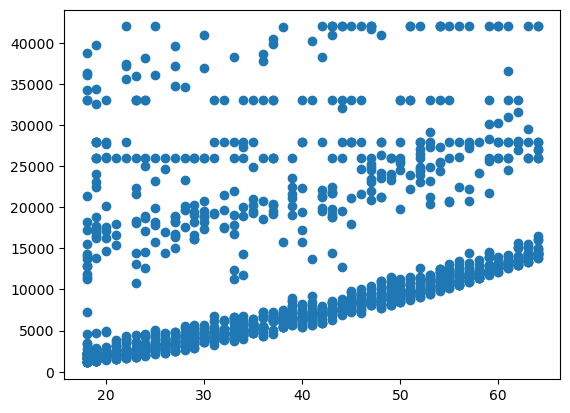

In [35]:
plt.scatter(x['age'],y)
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)


In [37]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
428,21,0,16,1,0,1,0,0,0
226,28,1,38,0,0,0,0,1,0
867,57,1,43,1,0,0,0,0,1
397,21,1,31,0,0,0,0,1,0
300,36,1,27,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1180,42,0,41,1,0,1,0,0,0
1147,20,0,31,0,0,0,1,0,0
527,51,0,25,1,0,0,0,0,1
1149,42,1,34,0,0,0,0,0,1


In [38]:
df1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27,0,1,0,0,0,1,16884
1,18,1,33,1,0,0,0,1,0,1725
2,28,1,33,3,0,0,0,1,0,4449
3,33,1,22,0,0,0,1,0,0,21984
4,32,1,28,0,0,0,1,0,0,3866
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,0,1,0,0,10600
1334,18,0,31,0,0,1,0,0,0,2205
1335,18,0,36,0,0,0,0,1,0,1629
1336,21,0,25,0,0,0,0,0,1,2007


In [39]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
7,37,0,27,3,0,0,1,0,0
999,36,0,26,0,0,0,1,0,0
1209,59,1,37,1,0,0,0,0,1
491,61,0,25,0,0,0,0,1,0
625,29,0,26,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
854,49,0,23,3,1,1,0,0,0
554,25,0,41,0,0,1,0,0,0
1278,39,1,29,1,1,1,0,0,0
374,20,1,33,0,0,0,0,1,0


In [40]:
lr=LinearRegression()

In [41]:
model=lr.fit(x_train,y_train)

In [42]:
y_pred=model.predict(x_test)

In [43]:
residual=y_pred-y_test

In [44]:
residual

7         727.736735
999       857.088743
1209     1095.584778
491    -11827.021904
625       740.860437
            ...     
854      5884.360394
554    -10547.929543
1278     5465.997213
374      3335.666506
6        3181.588205
Name: charges, Length: 402, dtype: float64

In [45]:
model.intercept_

-8062.649482925388

In [46]:
model.coef_

array([  235.31832944,  -101.46025362,   223.77502132,   475.18488046,
       19615.0457729 ,   334.98582965,  -102.8721882 ,   799.83395025,
       -1031.9475917 ])

In [47]:
# Model Evaluation for Testing Data
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 23338921.34473067
Root Mean Sqaured Error : 4831.037294901652
Mean Absolute Error : 3248.539057070271
R Squared Value : 0.7284951449235737
Adjusted R Squared Value : 0.7222616150876353


In [48]:
# Model Evaluation for Training Data

y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 28060999.590729617
Root Mean Sqaured Error : 5297.263405828487
Mean Absolute Error : 3521.9686073307257
R Squared Value : 0.7377642690782424
Adjusted R Squared Value : 0.7352155416718755


In [49]:
a=x.columns

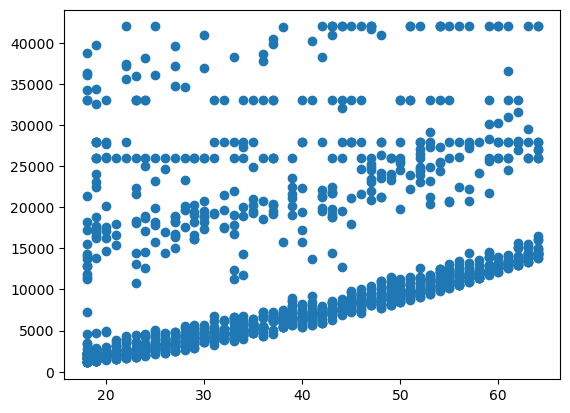

In [50]:
plt.scatter(x['age'],y)

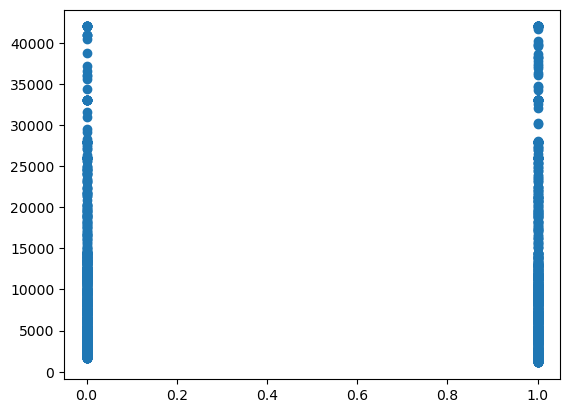

In [51]:
plt.scatter(x['sex'],y)

In [52]:
model.score(x_test,y_test)

0.7284951449235737

In [53]:
model.score(x_train,y_train)

0.7377642690782424

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
pf=PolynomialFeatures(2)

In [56]:
x_train_new=pf.fit_transform(x_train)
x_test_new=pf.fit_transform(x_test)

In [57]:
lr=LinearRegression()

In [58]:
new_model=lr.fit(x_train_new,y_train)

In [59]:
y_pred=new_model.predict(x_test_new)

In [60]:
y_pred

array([ 9596.2578125,  6626.1875   , 13498.1015625, 14798.5703125,
        4855.125    ,  9472.9921875, 10374.453125 , 25960.53125  ,
       10102.46875  , 17385.7421875,  2975.1171875,  4770.375    ,
        8358.015625 , 11312.4765625, 11344.9296875, 15487.953125 ,
        4232.65625  , 15737.6875   , 10772.109375 , 25732.28125  ,
       29318.21875  ,  2228.1640625,  3556.6953125,  8572.3125   ,
        5755.09375  , 14514.6015625,  9448.171875 , 15447.4140625,
        6729.4609375, 21973.71875  ,  1977.4375   , 28964.171875 ,
        8316.578125 ,  9770.5078125,  4748.7421875,  6611.40625  ,
       15901.8125   , 10260.7421875, 10711.78125  ,  9177.8984375,
       15342.71875  , 12060.421875 ,  6640.7265625,  8580.3515625,
         925.03125  ,  8633.640625 ,  9568.5859375, 27643.3125   ,
       14182.6484375, 13699.984375 , 39580.375    ,  3392.84375  ,
        9246.4453125, 16209.2109375, 12247.390625 , 15980.65625  ,
       12880.6328125,  7509.7578125,  8004.515625 , 32964.2656

In [61]:
residual1=y_pred-y_test
residual1

7        2315.257812
999      1359.187500
1209     1151.101562
491     -9714.429688
625      1119.125000
            ...     
854     -2841.656250
554    -13985.593750
1278     4452.734375
374       440.140625
6        1838.320312
Name: charges, Length: 402, dtype: float64

In [62]:
new_model.score(x_test_new,y_test)

0.7817271089355114

In [63]:
new_model

LinearRegression()

In [64]:
# no multicolinearity
w1=x.columns
w1

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [65]:
#x['age']
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)

vif_list

[1.01726177268879,
 1.0087878727132928,
 1.1077185445618232,
 1.0039908190450972,
 1.0121552821492232,
 8.44003739616887,
 8.466133450325406,
 11.328814839880824,
 9.062772654366263]

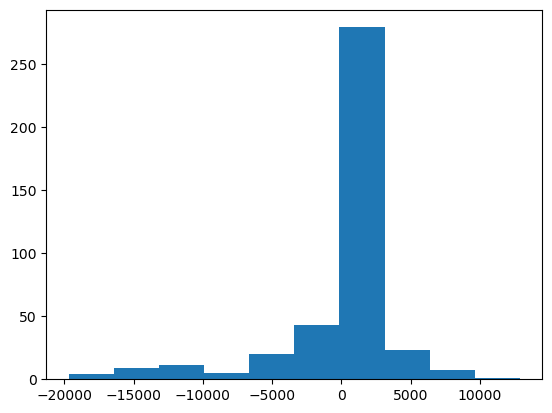

In [66]:
#noramlity residual
plt.hist(residual1,)
plt.show()

In [67]:
#homoscadasticity

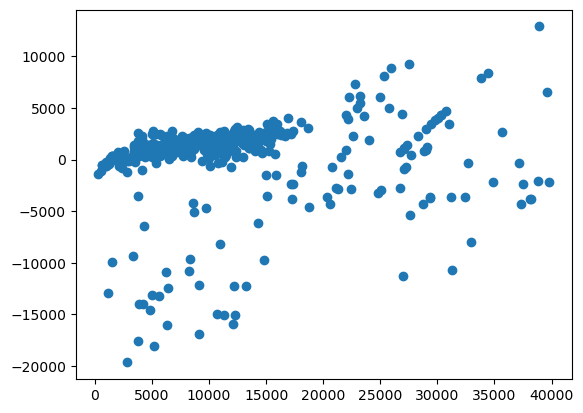

In [68]:
plt.scatter(y_pred,residual1)
plt.show()

In [69]:
def simple_linear_regression(x):
    y=(4*x)+3
    return y

def poly_degree_1(x):
    y=(4*(x**2))+(3*x)+2
    return y
def poly_degree_2(x):
    y=(6*(x**3))+3*(x**2)+(2*x)+9
    return y
def plot(x,y):
        plt.plot(x,y)
        plt.show()

In [70]:
import numpy as np

In [71]:
x=np.arange(-100,100,10,dtype=int)

In [72]:
x

array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
         10,   20,   30,   40,   50,   60,   70,   80,   90])

In [73]:
y=simple_linear_regression(x)

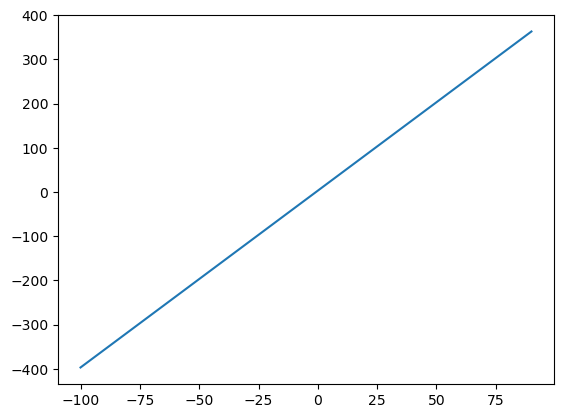

In [74]:
plot(x,y)

In [75]:
y=poly_degree_1(x)

In [76]:
y

array([39702, 32132, 25362, 19392, 14222,  9852,  6282,  3512,  1542,
         372,     2,   432,  1662,  3692,  6522, 10152, 14582, 19812,
       25842, 32672])

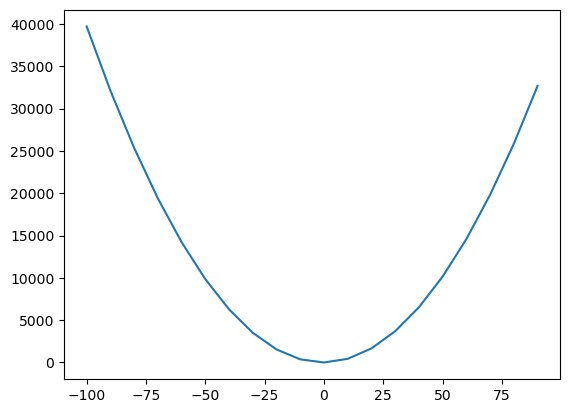

In [77]:
plot(x,y)

In [78]:
y=poly_degree_2(x)

In [79]:
y

array([-5970191, -4349871, -3052951, -2043431, -1285311,  -742591,
        -379271,  -159351,   -46831,    -5711,        9,     6329,
          49249,   164769,   388889,   757609,  1306929,  2072849,
        3091369,  4398489])

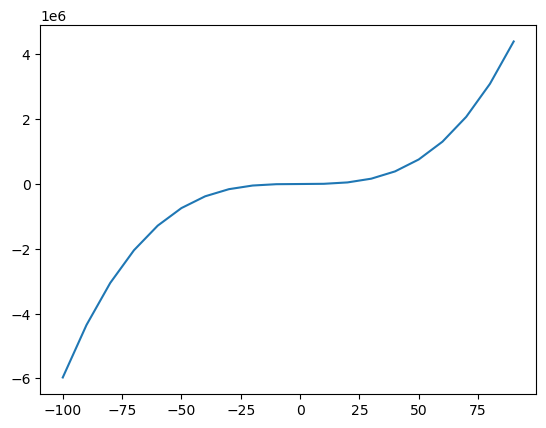

In [80]:
plot(x,y)

In [81]:
# regularizationR

In [82]:
new_model.score(x_train_new,y_train)

0.8157738904727199

In [83]:
new_model.score(x_test_new,y_test)

0.7817271089355114

In [84]:
# to handle overfitting we will aplly ridge regularization technique

In [85]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [86]:
l2=Ridge(alpha=0.01)

In [87]:
l2.fit(x_train_new,y_train)

Ridge(alpha=0.01)

In [88]:
l2.score(x_train_new,y_train)

0.8202624583708261

In [89]:
l2.score(x_test_new,y_test)

0.799498084856725

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
hyperparametre={'alpha':[0.0001,0.001,0.01,1]
               }
gs_cv_dc1=GridSearchCV(l2,hyperparametre,cv=5)

In [92]:
gs_cv_dc1.fit(x_train_new,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1]})

In [93]:
gs_cv_dc1.best_estimator_

Ridge(alpha=1)

In [94]:
l2_new=Ridge(alpha=1)

In [95]:
l2_new.fit(x_train_new,y_train)

Ridge(alpha=1)

In [96]:
l2_new.score(x_train_new,y_train)

0.8202487999113364

In [97]:
l2_new.score(x_test_new,y_test)

0.7990843145947537